# The Input Sqlite Path

In [1]:
db_path ='/Users/jerrysong/Study_Grad/Nankai_Research_with_Python/Nankai_Research/Temoa_2.0_collection/data_files/Self_MaAp/data/Temoa_CN_MaAp.sqlite'

# Requirements
比如说Primary Energy Breakdown、By-Sector Final Energy Breakdown、CO2 emissions（Total和By-Sector）

In [2]:
import sqlite3
con = sqlite3.connect(db_path) #change path to database
cur = con.cursor()   
con.text_factory = str 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML, display, Markdown, Image
import seaborn as sns

# the emission graph
def emission_graph(emission_type):
    df = pd.read_sql("SELECT * FROM Output_Emissions", con)
    df['emissions_comm'] = df['emissions_comm'].str.split('_').str[0]
    emission_df = df[df['emissions_comm'] == emission_type]
    # group by emission type and period, summing the emission amounts
    grouped = emission_df.groupby(['sector','t_periods']).agg({'emissions': np.sum})
    # pivot the table to have emission types as columns and periods as rows
    pivot_table = grouped.pivot_table(values='emissions', index='t_periods', columns='sector')
    # create a bar chart
    colors = sns.color_palette('tab20', len(pivot_table.columns))
    fig=pivot_table.plot(kind='bar', stacked=True,color=colors)
    fig.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)     
    # set the title and axis labels
    plt.title('Emission Amounts of {} by Type and Period'.format(emission_type))
    plt.xlabel('Period')
    plt.ylabel('Emission Amount')
    # show the chart
    plt.show()

import ipywidgets as widgets
from ipywidgets import HBox, VBox, Layout

def select_emission_comm():
    df = pd.read_sql("SELECT * FROM Output_Emissions", con)
    df['emissions_comm'] = df['emissions_comm'].str.split('_').str[0]
    select_options = df["emissions_comm"].unique()  
    layout = widgets.Layout(width='200px', height = '100px') 
    w1 = widgets.Select(options=np.sort(select_options),description='Emission_Type',layout=layout)
    w = widgets.interactive(emission_graph,emission_type = w1)
    controls_rows(w)

def controls_rows(w):
    controls = HBox(w.children[:-1], layout = Layout(flex_flow='row wrap', width='max-content'))
    output = w.children[-1]
    display(VBox([controls, output],  layout = Layout(flex_flow='columns wrap', width='max-content', height='max-content')))


# The Emission by Sector by Period

In [4]:
select_emission_comm()

TypeError: no numeric data to plot

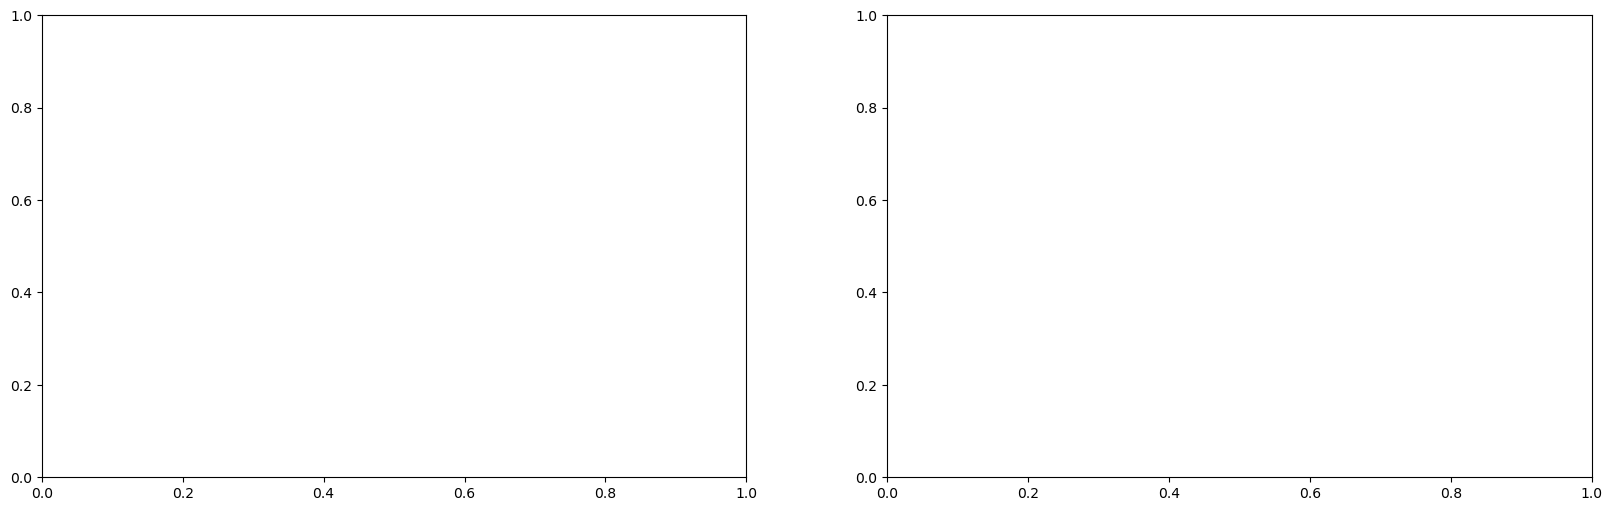

In [5]:
def primary_energy_graph():
    #Graph Structure
    fig, (add_fig_1, add_fig_2) = plt.subplots(1, 2, figsize=(20, 6))

    df = pd.read_sql("SELECT sector,t_periods,tech,vflow_out FROM Output_VFlow_Out", con)
    powerplant_df = df[df['sector'] == 'PowerPlants']
    grouped = powerplant_df.groupby(['t_periods','tech']).agg({'vflow_out': np.sum})
    # pivot the table to have emission types as columns and periods as rows
    pivot_table = grouped.pivot_table(values='vflow_out', index='t_periods', columns='tech')
    # create a bar chart
    fig_1=pivot_table.plot(kind='bar', stacked=True,ax = add_fig_1)
    fig_1.legend(loc=2, bbox_to_anchor=(1.05,1.0),ncol=2,borderaxespad = 0.)  
    fig_1.set_title('Power Plants')

    powerplant_df['tech'] = powerplant_df['tech'].str.split('_').str[1]
    powerplant_df['source'] = ''
    powerplant_df.loc[powerplant_df['tech'] == 'BIOIGCC', 'source'] = 'BIOIGCC'
    powerplant_df.loc[powerplant_df['tech'].str.slice(stop=4) == 'COAL', 'source'] = 'Coal'
    powerplant_df.loc[powerplant_df['tech'].str.slice(stop=3) == 'GEO', 'source'] = 'Geothermal'
    powerplant_df.loc[powerplant_df['tech'].str.slice(stop=3) == 'HYD', 'source'] = 'Hydropower'
    powerplant_df.loc[powerplant_df['tech'].str.slice(stop=3) == 'NGA', 'source'] = 'Nature Gas'
    powerplant_df.loc[powerplant_df['tech'].str.slice(stop=5) == 'SOLPV', 'source'] = 'Solor Power'
    powerplant_df.loc[powerplant_df['tech'].str.slice(stop=5) == 'SOLTH', 'source'] = 'Solor Thermal'
    powerplant_df.loc[powerplant_df['tech'].str.slice(stop=3) == 'WND', 'source'] = 'Wind Farm'
    powerplant_df.loc[powerplant_df['tech'].str.slice(stop=3) == 'URN', 'source'] = 'Uranium'
    powerplant_df.loc[powerplant_df['tech'].str.slice(stop=5) == 'BECCS', 'source'] = 'BECCS'
    powerplant_df.loc[powerplant_df['tech'].str.slice(stop=4) == 'Batt', 'source'] = 'Battery Storage'
    powerplant_df.loc[powerplant_df['tech'].str.slice(stop=3) == 'STO', 'source'] = 'Hydrogen'
    powerplant_df.loc[powerplant_df['tech'].str.slice(stop=4) == 'H2CC', 'source'] = 'Hydrogen'

    grouped = powerplant_df.groupby(['t_periods','source']).agg({'vflow_out': np.sum})
    pivot_table = grouped.pivot_table(values='vflow_out', index='t_periods', columns='source')
    fig_2=pivot_table.plot(kind='bar', stacked=True,ax = add_fig_2)
    fig_2.legend(loc=2, bbox_to_anchor=(1.05,1.0),ncol=2,borderaxespad = 0.)  
    fig_2.set_title('Power Source')

    #powerplant_df = df[df['sector'] == 'electric']
    #grouped = powerplant_df.groupby(['t_periods','tech']).agg({'vflow_out': np.sum})
    ## pivot the table to have emission types as columns and periods as rows
    #pivot_table = grouped.pivot_table(values='vflow_out', index='t_periods', columns='tech')
    ## create a bar chart
    #fig_2=pivot_table.plot(kind='bar', stacked=True,ax = add_fig_2)
    #fig_2.legend(loc=2, bbox_to_anchor=(1.05,1.0), ncol=2, borderaxespad=0.0)
    #ax2.set_title('Electric')


    # set the title and axis labels
    fig.suptitle('Primary Energy Breakdown', fontsize=16)
    fig.text(0.5, 0.04, 'Period', ha='center', fontsize=12)
    fig.text(0.04, 0.5, 'Emission Amount', va='center', rotation='vertical', fontsize=12)

    # adjust the spacing between subplots
    fig.subplots_adjust(wspace=0.8)


    # show the chart
    plt.show()


primary_energy_graph()

In [ ]:
def sector_final_breakdown(sector_type):
    df = pd.read_sql("SELECT sector,t_periods,tech,vflow_out FROM Output_VFlow_Out", con)
    sector_df = df[df['sector'] == sector_type]
    grouped = sector_df.groupby(['t_periods','tech']).agg({'vflow_out': np.sum})

    pivot_table = grouped.pivot_table(values='vflow_out', index='t_periods', columns='tech')
    # create a bar chart
    fig=pivot_table.plot(kind='bar', stacked=True)
    fig.legend(loc=2, bbox_to_anchor=(1.05,1.0),ncol=2,borderaxespad = 0.)
    plt.show()

def select_emission_comm():
    df = pd.read_sql("SELECT * FROM technologies", con)
    select_options = df["sector"].unique()  
    layout = widgets.Layout(width='200px', height = '100px') 
    w1 = widgets.Select(options=np.sort(select_options),description='Emission_Type',layout=layout)
    w = widgets.interactive(sector_final_breakdown,sector_type = w1)
    controls_rows(w)

def controls_rows(w):
    controls = HBox(w.children[:-1], layout = Layout(flex_flow='row wrap', width='max-content'))
    output = w.children[-1]
    display(VBox([controls, output],  layout = Layout(flex_flow='columns wrap', width='max-content', height='max-content')))

select_emission_comm()

### Technology/commodity look-up tool
Use the tool below to provide a description for any technology or commodity within the database. Type the commodity or technology name in the box below to view its description.

In [ ]:
w = widgets.Text(value='ELC')
display(w)
def f(w):
    df = pd.read_sql("SELECT * FROM commodities WHERE comm_name='" + w + "'", con)
    if len(df)==0:
        df = pd.read_sql("SELECT * FROM technologies WHERE tech='" + w + "'", con)

    if len(df)>0:
        try:
            display(Markdown(df['comm_desc'].values[0].replace('#', '').strip()))
        except:
            display(Markdown(df['tech_desc'].values[0].replace('#', '').strip()))
    else:
        print('')
out = widgets.interactive_output(f, {'w': w})
display(out)

Text(value='ELC')

Output()